In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## univariate

In [3]:
clustering1= KMeans(n_clusters=3)
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [4]:
df["Income Cluster"]=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [5]:
df["Income Cluster"].value_counts()


0    90
2    74
1    36
Name: Income Cluster, dtype: int64

In [6]:
clustering1.inertia_

23517.33093093092

In [7]:
inertia_scores=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)
inertia_scores
    

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3931.9880952380995,
 2857.4416971916967,
 2208.8120490620495,
 1734.167748917749]

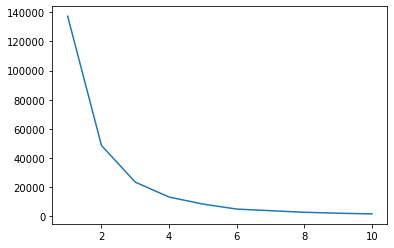

In [8]:
plt.plot(range(1,11),inertia_scores) #elbow method

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [10]:
df.groupby("Income Cluster")['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,37.833333,99.888889,50.638889
2,39.500000,33.486486,50.229730


## bivariate

In [11]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df["Spending and Income cluster"]= clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,0


In [12]:
df["Spending and Income cluster"].value_counts()

2    81
1    39
4    35
0    23
3    22
Name: Spending and Income cluster, dtype: int64

In [13]:
inertia_scores=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores
    

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25018.781613414074,
 21826.936303231643,
 19672.07284901432]

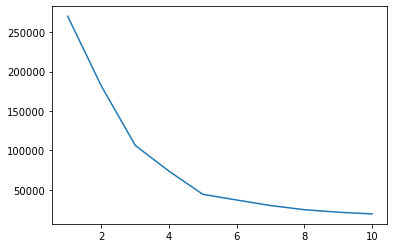

In [14]:
plt.plot(range(1,11),inertia_scores) #elbow method

In [15]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,25.727273,79.363636
4,88.200000,17.114286


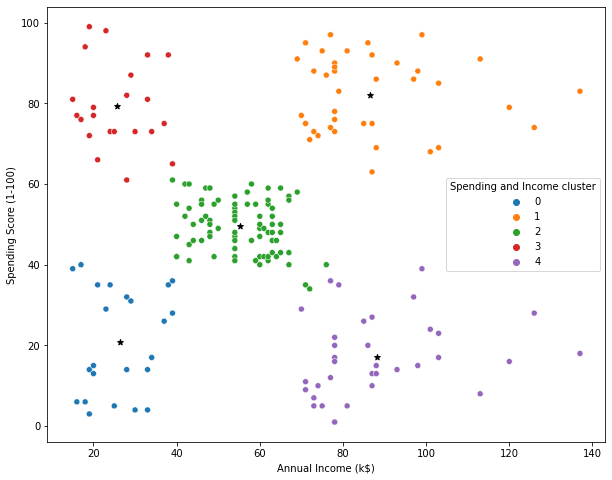

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],c='black',marker="*")
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue="Spending and Income cluster",palette="tab10")
plt.savefig('Clustering_bivariate.png')

In [17]:
pd.crosstab(df['Spending and Income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.590909,0.409091
4,0.457143,0.542857


In [18]:
df.groupby('Spending and Income cluster')['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


## multivariate

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [20]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster,Gender_Male
0,1,19,15,39,2,0,1
1,2,21,15,81,2,3,1
2,3,20,16,6,2,0,0
3,4,23,16,77,2,3,0
4,5,31,17,40,2,0,0


In [21]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


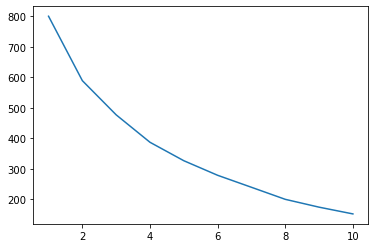

In [22]:
inertia_scores=[]
for i in range(1,11):
    kmeans3= KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores) #elbow method

In [23]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,1,4
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,4


In [24]:
df.to_csv("Clustering.csv",index=False)